# Measuring Allusive Density in Lucan's *Bellum Civile* with Tesserae
## Patrick J. Burns, Fordham University, Dept. of Classics
### Digital Antiquity Coffee House, ISAW. 10/2/15



## What is Tesserae?

Tesserae is "freely available tool for detecting allusions in Latin poetry." More precisely, it is a search tool designed for comparing the texts of two authors, comparing them by looking for shared words and returning an list of scored results. 

While the settings can be configured, the basic scoring algorithm assigns scores from 10-2 based on two main factors:

   - frequency of the matching words
   - distance between the words

Accordingly, less common, adjacent words should score higher than more common, words separated by gap of several words. E.g.,

   - **livor edax** (Ov. Am. 1.15.1 ~ Luc. 1.288) receives a score of 10.
        - *Quid mihi Livor edax, ignavos obicis annos,*
        - *Livor edax tibi cuncta negat: gentesque subactas*
   - **quod...te** (Ov. Am. 2.9b.47 ~ Luc. 9.854) receives a score of 3.

As the team itself reports, "This score is a guess as to the significance of the result. …Initial testing has shown that Tesserae's score tends to correlate roughly with human-perceived literary significance, but it remains a work in progress. Scores may change as we continue to update the program."[\*](http://tesserae.caset.buffalo.edu/help_results.php)

Reports of this initial testing are published at:

   - Coffee, N., J.-P. Koenig, S. Poornima, R. Ossewaarde, C. Forstall, and S. Jacobson. 2012. "Intertextuality in the Digital Age." *TAPA* 142: 383-422.
    
Other Tesserae research can be found at [http://tesserae.caset.buffalo.edu/blog/research-at-tesserae/](http://tesserae.caset.buffalo.edu/blog/research-at-tesserae/)

The Tesserae platform was originally developed using Latin-language texts. Greek and English are now available. (Today's presentation will deal only with Latin texts)

Tesserae is hosted at the University at Buffalo where it is a joint collaboration between the Classics and Linguistics departments. It can be found online at [http://tesserae.caset.buffalo.edu](http://tesserae.caset.buffalo.edu).


Search interface

<img src='../img/tess1.png'>

Results interface

<img src='../img/tess2.png'>

## Code

### Python
This presentation is written as an iPython notebook on Python 3.4.3.

### Dependencies
To run the code in this notebook, the following dependencies need to be installed:
- numpy (tested 1.9.2)
- pandas (tested 0.16.2)

### Imports

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

### Variables

In [2]:
unit = "line"
data_dir = '../data/' + unit + '/preprocessed/'

Let's look first at all Tesserae scores returned for:
   - Source: Vergil, *Aeneid*
   - Target: Lucan, *Bellum Civile*

First, we'll get the Tesserae .csv file into a Pandas dataframe. Note that I've already renamed the raw output from Tesserae and stripped the metadata that Tesserae returns with .csv files.

In [3]:
file = data_dir + 'lucan-vergil-aeneid.csv'
vergil = pd.read_csv(file)
print(vergil.head())

   RESULT   TARGET_LOC                                         TARGET_TXT  \
0       1  luc. 10.122  Fulget gemma toris, et **iaspide** **fulva** s...   
1       2   luc. 8.155  Iam poterant oculis: tanto **devinxit** **amore**   
2       3  luc. 10.135    Vix ulla fuscante tamen **lanugine** **malas**.   
3       4    luc. 6.35  Graiorumque **domos**, **direptaque** moenia t...   
4       5   luc. 8.776   Excitat invalidas admoto **fomite** **flammas**.   

          SOURCE_LOC                                         SOURCE_TXT  \
0   verg. aen. 4.261  conspicit; atque illi stellatus **iaspide** **...   
1   verg. aen. 8.394   Tum pater aeterno fatur **devinctus** **amore**:   
2  verg. aen. 10.324  Tu quoque, flaventem prima **lanugine** **malas**   
3   verg. aen. 2.563     et **direpta** **domus**, et parvi casus Iuli.   
4   verg. aen. 1.176  nutrimenta dedit, rapuitque in **fomite** **fl...   

                  SHARED  SCORE  
0  fuluum-fuluus; iaspis     10  
1         amor; de

Let's see how many total results Tesserae has returned for this search. 

In [4]:
print('There are', len(vergil), 'Tesserae results.')

There are 46385 Tesserae results.


Let's aggregate and count the scores to learn what kind of results Tesserae returns.

In [5]:
vergil_scores = vergil.groupby('SCORE').agg({'SCORE': [np.size]})

print('Aggregated scores for Aeneid > BC')
print(vergil_scores)

print('\n')

x = list(vergil_scores.index)
y = list(vergil_scores['SCORE']['size'])

Aggregated scores for Aeneid > BC
       SCORE
        size
SCORE       
3          6
4        595
5      12805
6      21528
7       8685
8       2116
9        564
10        86




Let's plot this.

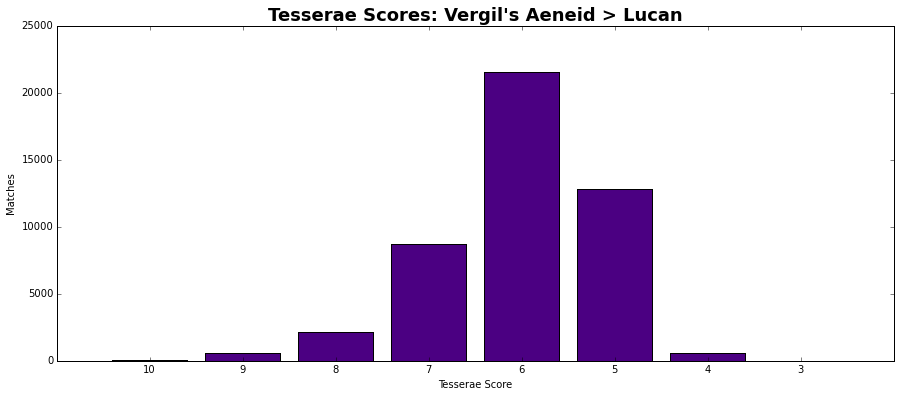

In [6]:
fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
ax.bar(x, y, align='center',color='indigo')
ax.set_title('Tesserae Scores: Vergil\'s Aeneid > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()
plt.show()

We can see from this chart that the majority of results have a score of either 5 or 6. Research shows that these scores correspond with less significant intertexts. Let's set a cutoff of 7 for the score we look at and get a subset of the *vergil* dataframe

In [7]:
cutoff = 7
vergil = vergil.loc[vergil['SCORE'] >= cutoff]

print('There are', len(vergil), 'Tesserae results with scores 7 or higher.')


There are 11451 Tesserae results with scores 7 or higher.


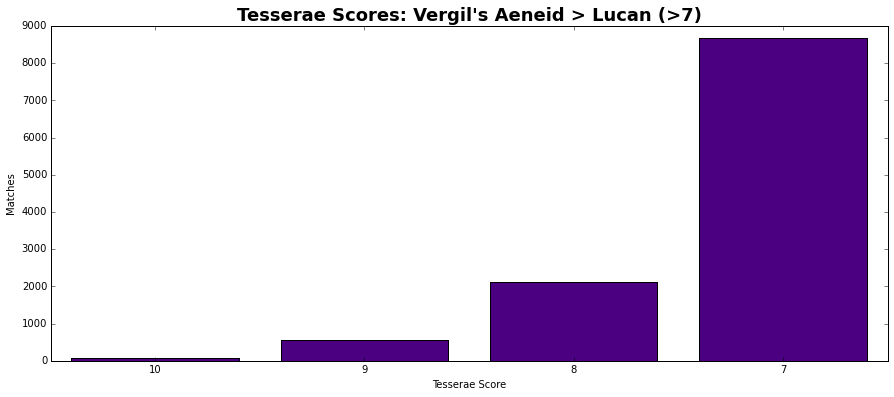

In [8]:
vergil_scores = vergil.groupby('SCORE').agg({'SCORE': [np.size]})

x = list(vergil_scores.index)
y = list(vergil_scores['SCORE']['size'])

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
ax.bar(x, y, align='center',color='indigo')
ax.set_title('Tesserae Scores: Vergil\'s Aeneid > Lucan (>7)', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()
plt.show()

The work of Coffee's team at U. Buffalo has focused on epic-to-epic comparisons such as this. Let's see what kind of results we get from cross-genre searches.

In [9]:
file = data_dir + 'lucan-tibullus-elegies.csv'
tibullus = pd.read_csv(file)
print(tibullus.head())

   RESULT   TARGET_LOC                                         TARGET_TXT  \
0       1  luc. 10.164   Accipiunt sertas nardo **florente** **coronas**,   
1       2  luc. 10.126   Ut mos est Phariis miscendi **licia** **telis**.   
2       3   luc. 9.160  Et **tectum** **lino** spargam per vulgus Osirin,   
3       4   luc. 4.224     Eruerent, nulli vallarent **oppida** **muri**,   
4       5    luc. 9.61  Quidquid ab **extincto** **licuisset** tollere...   

     SOURCE_LOC                                         SOURCE_TXT  \
0   tib. 2.1.59    rure puer uerno primum de **flore** **coronam**   
1   tib. 1.6.79    Firmaque conductis adnectit **licia** **telis**   
2   tib. 1.3.30        Ante sacras **lino** **tecta** fores sedeat   
3  tib. 3.7.174  quin etiam structis exsurgunt **oppida** **mur...   
4   tib. 2.6.16     si **licet**, **extinctas** aspiciamque faces!   

                           SHARED  SCORE  
0                  floreo; corona     10  
1        licium; tela-telis-te

In [10]:
print('There are', len(tibullus), 'Tesserae results.')

There are 6860 Tesserae results.


This is much lower than the results from Vergil's *Aeneid* (46385 v. 6860)

Let's exclude the lower scores as well.

In [11]:
tibullus = tibullus.loc[tibullus['SCORE'] >= cutoff]

print('There are', len(tibullus), 'Tesserae results with scores 7 or higher.')


There are 1887 Tesserae results with scores 7 or higher.


This is also lower (11451 v. 1887)

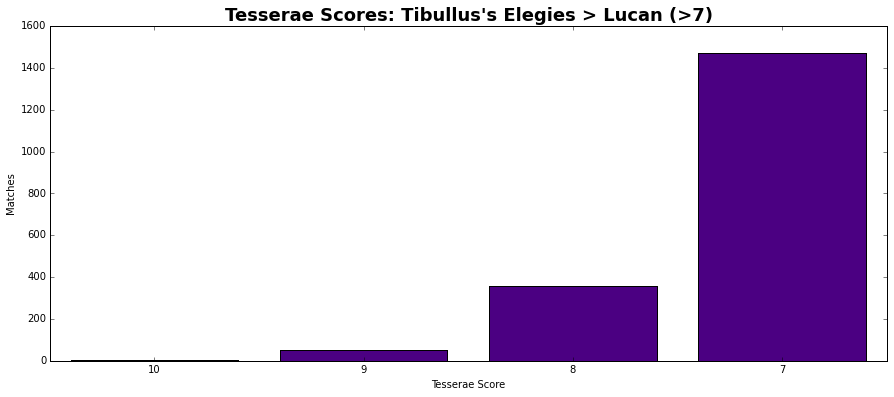

In [12]:
tibullus_scores = tibullus.groupby('SCORE').agg({'SCORE': [np.size]})

x = list(tibullus_scores.index)
y = list(tibullus_scores['SCORE']['size'])

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
ax.bar(x, y, align='center',color='indigo')
ax.set_title('Tesserae Scores: Tibullus\'s Elegies > Lucan (>7)', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()
plt.show()




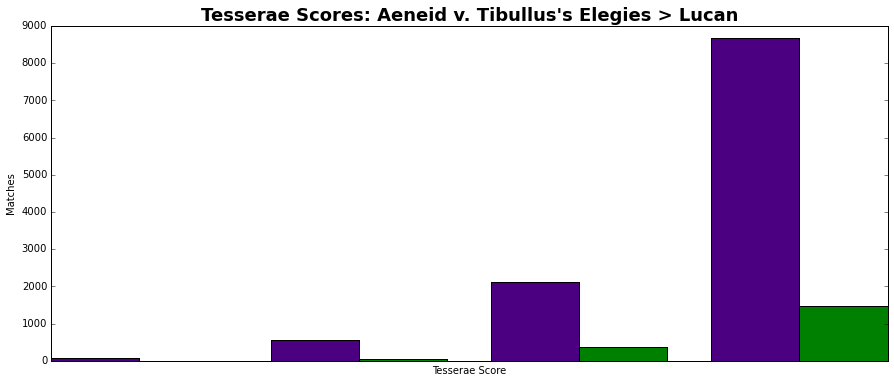

In [13]:
x1 = list(vergil_scores.index)
x2 = list(tibullus_scores.index)
y1 = list(vergil_scores['SCORE']['size'])
y2 = list(tibullus_scores['SCORE']['size'])


n = 4

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
bar_width = 0.4  # default: 0.8
bar_locations = np.arange(n)

ax.set_title('Tesserae Scores: Aeneid v. Tibullus\'s Elegies > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()

ax.bar(bar_locations, y1, bar_width, color='indigo')
ax.bar(
    bar_locations - bar_width, 
    y2, 
    bar_width, 
    color='green'
)

plt.show()

But wait... the *Aeneid* is much longer than Tibullus *omnia opera* (the third book being generous included!)

In [14]:
vergil_lines = 756 + 804 + 718 + 705 + 871 + 901 + 817 + 731 + 818 + 908 + 915 + 952
tibullus_lines = 811 + 430 + 688

print('There are',vergil_lines,'lines in the Aeneid.')
print('There are',tibullus_lines,'lines in the three books of Tibullus.')

There are 9896 lines in the Aeneid.
There are 1929 lines in the three books of Tibullus.


In [15]:
tibullus_matches = len(tibullus)
vergil_matches = len(vergil)

vergil_matches_per_100 = (vergil_matches / vergil_lines * 100)
tibullus_matches_per_100 = (tibullus_matches / tibullus_lines * 100)

print('There are ',round(vergil_matches_per_100,2),'matches per 100 lines in the Aeneid.')
print('There are ',round(tibullus_matches_per_100,2),'matches per 100 lines in the three books of Tibullus.')

There are  115.71 matches per 100 lines in the Aeneid.
There are  97.82 matches per 100 lines in the three books of Tibullus.


In [16]:
vergil_test = vergil_scores
tibullus_test = tibullus_scores

In [17]:
print(vergil_test)

      SCORE
       size
SCORE      
7      8685
8      2116
9       564
10       86


In [18]:
vergil_scores['per_100'] = vergil_scores['SCORE']['size'].map(lambda x: round((x / vergil_lines) * 100,2))
tibullus_scores['per_100'] = tibullus_scores['SCORE']['size'].map(lambda x: round((x / tibullus_lines) * 100,2))

In [19]:
print(vergil_scores)
print('\n')
print(tibullus_scores)

      SCORE per_100
       size        
SCORE              
7      8685   87.76
8      2116   21.38
9       564    5.70
10       86    0.87


      SCORE per_100
       size        
SCORE              
7      1472   76.31
8       358   18.56
9        51    2.64
10        6    0.31


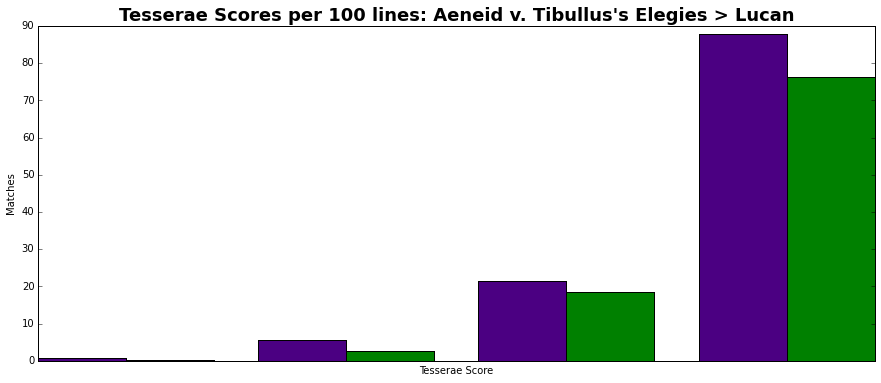

In [20]:
y1 = list(vergil_scores['per_100'])
y2 = list(tibullus_scores['per_100'])

n = 4

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)
bar_width = 0.4  # default: 0.8
bar_locations = np.arange(n)

ax.set_title('Tesserae Scores per 100 lines: Aeneid v. Tibullus\'s Elegies > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()

ax.bar(bar_locations, y1, bar_width, color='indigo')
ax.bar(
    bar_locations - bar_width, 
    y2, 
    bar_width, 
    color='green'
)


plt.show()

In [21]:
file = data_dir + 'lucan-propertius-elegies.csv'
propertius = pd.read_csv(file)
print(propertius.head())

   RESULT  TARGET_LOC                                         TARGET_TXT  \
0       1  luc. 1.473  Est, qui, tauriferis ubi se **Mevania** **camp...   
1       2  luc. 2.722  Et iam Pleias hebet, flexi iam **plaustra** **...   
2       3  luc. 3.260  Fertilis Euphrates Phariae **vice** **fungitur...   
3       4  luc. 7.861  Navita, nec terram quisquam **movisset** **ara...   
4       5  luc. 5.117  Numinis aut poena est **mors** **immatura** re...   

      SOURCE_LOC                                         SOURCE_TXT  \
0   prop. 4.1.52     qua nebulosa cauo rorat **Meuania** **campo**,   
1   prop. 3.5.35  cur serus versare boves et **plaustra** **Boot...   
2  prop. 4.11.75  **fungere** maternis **uicibus**, pater: illa ...   
3   prop. 4.1.25   uerbera pellitus saetosa **mouebat** **arator**,   
4    prop. 3.7.2       per te **immaturum** **mortis** adimus iter;   

              SHARED  SCORE  
0    campus; meuania     10  
1  bootes; plaustrum     10  
2      uicis; fungor     1

In [22]:
print('There are', len(propertius), 'Tesserae results.')

propertius = propertius.loc[propertius['SCORE'] >= cutoff]

print('There are', len(propertius), 'Tesserae results with scores 7 or higher.')
print('\n')

propertius_scores = propertius.groupby('SCORE').agg({'SCORE': [np.size]})

print(propertius_scores)

There are 13812 Tesserae results.
There are 3470 Tesserae results with scores 7 or higher.


      SCORE
       size
SCORE      
7      2703
8       628
9       126
10       13


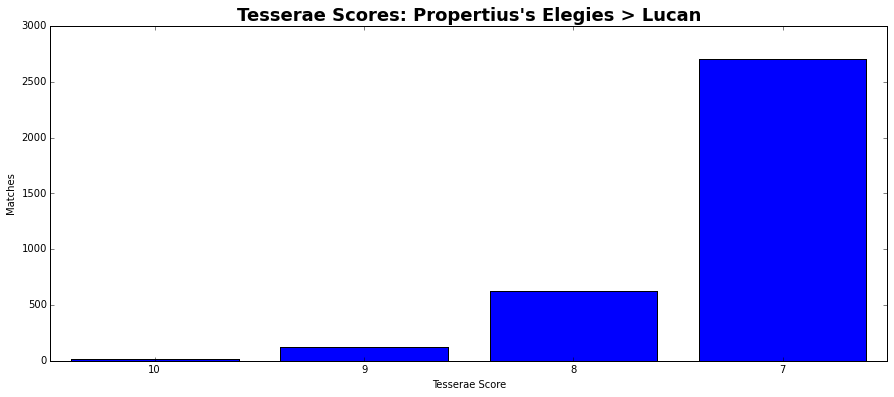

In [23]:
x = list(propertius_scores.index)
y = list(propertius_scores['SCORE']['size'])

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

ax.bar(x, y, align='center', color='blue')
ax.set_title('Tesserae Scores: Propertius\'s Elegies > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.invert_xaxis()
plt.show()

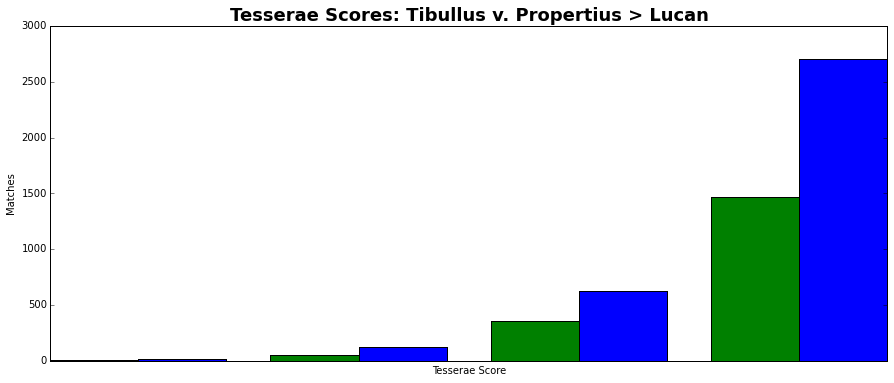

In [24]:
x1 = list(tibullus_scores.index)
x2 = list(propertius_scores.index)
y1 = list(tibullus_scores['SCORE']['size'])
y2 = list(propertius_scores['SCORE']['size'])

n = 4

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

bar_width = 0.4  # default: 0.8
bar_locations = np.arange(n)

ax.set_title('Tesserae Scores: Tibullus v. Propertius > Lucan', fontsize = 18, fontweight = "bold")
ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(x)
ax.set_xticklabels(x)

ax.invert_xaxis()
ax.bar(bar_locations, y1, bar_width, color="green")
ax.bar(
    bar_locations - bar_width, 
    y2, 
    bar_width, 
    color='blue'
)

plt.show()

In [25]:
propertius_lines = 703 + 1359 + 986 + 934
propertius_scores['per_100'] = propertius_scores['SCORE']['size'].map(lambda x: round((x / propertius_lines) * 100,2))
print(propertius_scores)

      SCORE per_100
       size        
SCORE              
7      2703   67.88
8       628   15.77
9       126    3.16
10       13    0.33


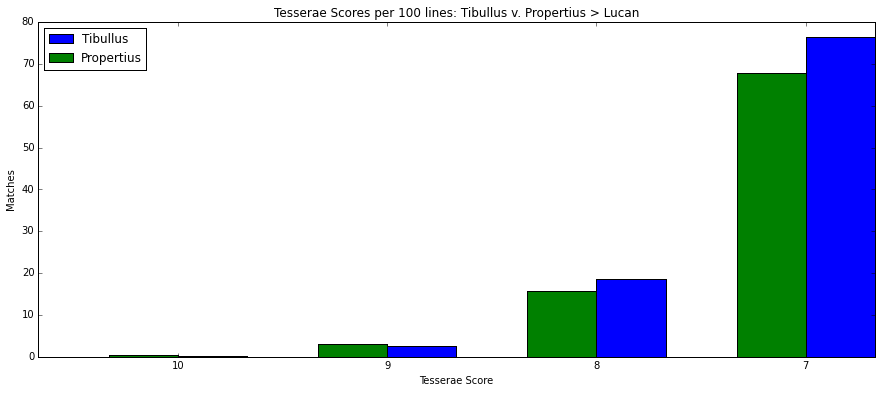

In [26]:
y1 = list(tibullus_scores['per_100'])
y2 = list(propertius_scores['per_100'])

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.33       # the width of the bars

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, y1, width, color='b')
rects2 = ax.bar(ind+width, y2, width, color='g')

ax.set_title('Tesserae Scores per 100 lines: Tibullus v. Propertius > Lucan')
ax.set_ylabel('Matches')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('7', '8', '9','10') )
ax.set_xlabel('Tesserae Score')



ax.invert_xaxis()

ax.legend( (rects1[0], rects2[0]), ('Tibullus','Propertius'), loc = 2 )

plt.show()

### Ovid's Elegy and Lucan

In [27]:
files = ['lucan-ovid-amores.csv','lucan-ovid-ars_amatoria.csv','lucan-ovid-heroides.csv','lucan-ovid-medicamina.csv','lucan-ovid-remedia_amoris.csv']

names = [file[:-4] for file in files] # strip ext
names = [name[6:] for name in names] # strip 'lucan-'

files = [data_dir + file for file in files]

ovid = [pd.read_csv(file) for file in files]

In [28]:

ovid_results = [list(x) for x in zip(names, ovid)]

for result in ovid_results:
    result[1] = result[1].loc[result[1]['SCORE'] >= cutoff]

for item in ovid_results:
    print('There are',len(item[1]),'matches in',item[0],'with scores 7 or higher.')  
    
print('\n')
    
ovid_scores = []

for result in ovid_results:    
    temp = result[1].groupby('SCORE').agg({'SCORE': [np.size]})
    ovid_scores.append(temp) 
    
ovid_amores_lines = 763 + 812 + 870
ovid_ars_lines = 772 + 746 + 812
ovid_heroides_lines = 116 + 148 + 154 + 176 + 150 + 166 + 198 + 120 + 168 + 152 + 130 + 214 + 160 + 130 + 220 + 378 + 268 + 218 + 210 + 244 + 250 
ovid_medicamina_lines = 100
ovid_remedia_lines = 814

ovid_lines = [ovid_amores_lines,ovid_ars_lines,ovid_heroides_lines,ovid_medicamina_lines,ovid_remedia_lines]

ovid_scores = [list(x) for x in zip(ovid_scores,ovid_lines)]    

for scores in ovid_scores:
    scores[0]['per_100'] = scores[0]['SCORE']['size'].map(lambda x: (x / scores[1]) * 100)
    
for scores in ovid_scores:
    print(scores[0],'\n')

There are 2384 matches in ovid-amores with scores 7 or higher.
There are 2101 matches in ovid-ars_amatoria with scores 7 or higher.
There are 4047 matches in ovid-heroides with scores 7 or higher.
There are 42 matches in ovid-medicamina with scores 7 or higher.
There are 701 matches in ovid-remedia_amoris with scores 7 or higher.


      SCORE    per_100
       size           
SCORE                 
7      1854  75.828221
8       451  18.445808
9        67   2.740286
10       12   0.490798 

      SCORE    per_100
       size           
SCORE                 
7      1684  72.274678
8       349  14.978541
9        65   2.789700
10        3   0.128755 

      SCORE    per_100
       size           
SCORE                 
7      3139  79.068010
8       734  18.488665
9       169   4.256927
10        5   0.125945 

      SCORE per_100
       size        
SCORE              
7        33      33
8         6       6
9         2       2
10        1       1 

      SCORE    per_100
       size 

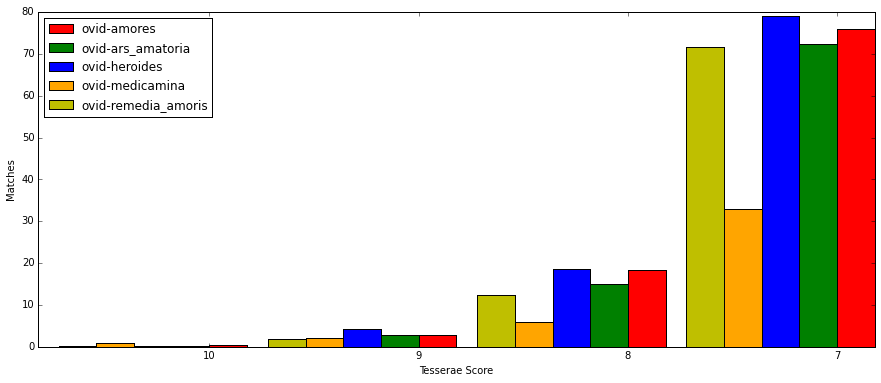

In [29]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.18       # the width of the bars

fig = plt.figure()
fig.set_size_inches(15,6)
ax = fig.add_subplot(111)


y1 = list(ovid_scores[0][0]['per_100'])
y2 = list(ovid_scores[1][0]['per_100'])
y3 = list(ovid_scores[2][0]['per_100'])
y4 = list(ovid_scores[3][0]['per_100'])
y5 = list(ovid_scores[4][0]['per_100'])

rects1 = ax.bar(ind, y1, width, color='r')
rects2 = ax.bar(ind+width, y2, width, color='g')
rects3 = ax.bar(ind+width*2, y3, width, color='b')
rects4 = ax.bar(ind+width*3, y4, width, color='orange')
rects5 = ax.bar(ind+width*4, y5, width, color='y')

ax.set_xlabel('Tesserae Score')
ax.set_ylabel('Matches')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('7', '8', '9','10') )

ax.invert_xaxis()

ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), names, loc = 2 )


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)


plt.show()


### Bernstein's Score

In [30]:
# Sample counts from Propertius
scores_counts =[(7,2703),(8,628),(9,126),(10,13)]

def bernstein(scores_counts):
    bernstein = 0
    for score in scores_counts:
        if score[0] == 7:
            bernstein += score[1] * .057
        elif score[0] == 8:
            bernstein += score[1] * .225
        elif score[0] == 9:
            bernstein += score[1] * 1
        elif score[0] == 10:
            bernstein += score[1] * 6.168
    return(bernstein)

print(bernstein(scores_counts))

501.55499999999995


# Mapping Allusive Density

Let's use Tesserae to figure out where in Lucan's text we are most likely to see elegiac intertexts.

In [31]:
import glob

results = pd.DataFrame()
filenames = np.array(glob.glob(data_dir+'*.csv'))

filenames = [f for f in filenames if 'vergil' not in f]

We need to add all of the elegy csv files to a single dataframe.

In [32]:
for file in filenames:
    df = pd.read_csv(file)
    results = results.append(df)

results = results.reset_index(drop=True)

Here are the first five results from the combined file. Tesserae includes the author, book, and line information in one cell. We are going to want to use both book and line "location" data for our map. So we need to extract it into its own column. 

In [49]:
# SEE http://www.swegler.com/becky/blog/2014/08/06/useful-pandas-snippets/
results['TARGET_AUTHOR'], results['TARGET_BOOK'], results['TARGET_LINE'] = zip(*results['TARGET_LOC'].apply(lambda x: x.split('.')))
#df['A'].apply(str)

results['TARGET_BOOK'] = results['TARGET_BOOK'].apply(int)
results['TARGET_LINE'] = results['TARGET_LINE'].apply(int)

In [50]:
results

,RESULT,TARGET_LOC,TARGET_TXT,SOURCE_LOC,SOURCE_TXT,SHARED,SCORE,TARGET_AUTHOR,TARGET_BOOK,TARGET_LINE
0,1,luc. 10.429,Est operis: visum famulis **reparabile** **dam...,ov. am. 1.14.55,Collige cum vultu mentem! **reparabile** **dam...,damnum; reparabilis,10,luc,10,429
1,2,luc. 2.594,"Armenios, **Cilicasque** **feros**, Taurosque ...",ov. am. 2.16.39,Sed Scythiam **Cilicasque** **feros** viridesq...,ferus; cilicasque,10,luc,2,594
2,3,luc. 2.612,"Cecropiae, victum mentitis **Thesea** **velis**.",ov. am. 1.7.15,Talis periuri promissaque **velaque** **Thesei**,theseus; uela-uelum,10,luc,2,612
3,4,luc. 4.457,Huc fractas Aquilone **rates** **submersaque**...,ov. am. 2.16.25,Non quae **submersis** **ratibus** saturata Ch...,submergo; ratis,10,luc,4,457
4,5,luc. 5.322,Detegit imbelles animos nil **fortiter** **ausa**,ov. am. 2.5.9,"Felix, qui quod amat defendere **fortiter** **...",audeo; fortiter,10,luc,5,322
5,6,luc. 7.420,"Possedit, **citius** **per** prospera fata cuc...",ov. am. 1.8.92,Fit **cito** **per** multas praeda petita manus.,citus; per,10,luc,7,420
6,7,luc. 3.107,**Praetor** adest: **vacuaeque** loco cessere ...,ov. am. 3.2.65,Maxima iam **vacuo** **praetor** spectacula circo,uacuus; praetor,10,luc,3,107
7,8,luc. 4.224,"Eruerent, nulli vallarent **oppida** **muri**,",ov. am. 2.12.7,"Non humiles **muri**, non parvis **oppida** fo...",murus-mus; oppidum,10,luc,4,224
8,9,luc. 6.369,"Quique nec humentes nebulas, nec **rore** **ma...",ov. am. 1.6.55,"Urbe silent tota, vitreoque **madentia** **rore**",ros; madeo,10,luc,6,369
9,10,luc. 4.316,"tunc herbas frondesque terunt, et **rore** **m...",ov. am. 1.6.55,"Urbe silent tota, vitreoque **madentia** **rore**",ros; madeo,10,luc,4,316


In [34]:
print(results.head())

   RESULT   TARGET_LOC                                         TARGET_TXT  \
0       1  luc. 10.429  Est operis: visum famulis **reparabile** **dam...   
1       2   luc. 2.594  Armenios, **Cilicasque** **feros**, Taurosque ...   
2       3   luc. 2.612   Cecropiae, victum mentitis **Thesea** **velis**.   
3       4   luc. 4.457  Huc fractas Aquilone **rates** **submersaque**...   
4       5   luc. 5.322  Detegit imbelles animos nil **fortiter** **ausa**   

        SOURCE_LOC                                         SOURCE_TXT  \
0  ov. am. 1.14.55  Collige cum vultu mentem! **reparabile** **dam...   
1  ov. am. 2.16.39  Sed Scythiam **Cilicasque** **feros** viridesq...   
2   ov. am. 1.7.15   Talis periuri promissaque **velaque** **Thesei**   
3  ov. am. 2.16.25  Non quae **submersis** **ratibus** saturata Ch...   
4    ov. am. 2.5.9  Felix, qui quod amat defendere **fortiter** **...   

                SHARED  SCORE TARGET_AUTHOR  TARGET_BOOK  TARGET_LINE  
0  damnum; reparabilis    

In [35]:
# Get results for a single book, sort
bc1 = results.loc[results['TARGET_BOOK'] == 1]
bc1 = bc1.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])

In [36]:
print(bc1.head())

      RESULT TARGET_LOC                                         TARGET_TXT  \
7396    7397   luc. 1.1  Bella **per** Emathios **plus** quam civilia c...   
7397    7398   luc. 1.1  Bella **per** Emathios **plus** quam civilia c...   
8230    8231   luc. 1.1  Bella per Emathios **plus** **quam** civilia c...   
8231    8232   luc. 1.1  Bella per Emathios **plus** **quam** civilia c...   
8776    8777   luc. 1.1  Bella **per** Emathios **plus** quam civilia c...   

           SOURCE_LOC                                         SOURCE_TXT  \
7396  ov. am. 2.17.28      Et **multae** **per** me nomen habere volunt;   
7397   ov. am. 1.8.92   Fit cito **per** **multas** praeda petita manus.   
8230  ov. am. 3.14.33  Cur **plus** **quam** somno turbatos esse capi...   
8231   ov. am. 3.1.47  Et tamen emerui **plus** **quam** tu posse, fe...   
8776    ov. am. 3.1.1  Stat vetus et **multos** incaedua silva **per*...   

            SHARED  SCORE TARGET_AUTHOR  TARGET_BOOK  TARGET_LINE  
7396  

In [37]:
# Get number of matches for each line, sum the scores
line_scores = bc1.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})
print(line_scores.head())
print('\n')

print('I was curious about the highest sum, so...\n')
print(line_scores[line_scores['SCORE']['sum']==line_scores['SCORE']['sum'].max()])
print('\n')
print('BC 1.202: \'Caesar, ubique tuus (liceat modo, nunc quoque) miles.\'')

            TARGET_LINE SCORE
                   size   sum
TARGET_LINE                  
1                    48   242
2                    37   204
3                     2    15
4                     2    16
5                    22   136


I was curious about the highest sum, so...

            TARGET_LINE SCORE
                   size   sum
TARGET_LINE                  
202                 118   637


BC 1.202: 'Caesar, ubique tuus (liceat modo, nunc quoque) miles.'


In [38]:
# Numpy agg function (obv.) leaves out lines that have no results, so we need to put the zeroes back in
x = list(line_scores.index)
y = list(line_scores['SCORE']['sum'])

b1_len = 695 #length of Book 1
z = []

for i in range(1,b1_len+1):
    if i in x:
        z.append((i,y[x.index(i)]))
    else:
        z.append((i,0))
        
scores = [list(t) for t in zip(*z)]

x = scores[0]
y = scores[1]

avg = sum(scores[1])/len(scores[1])


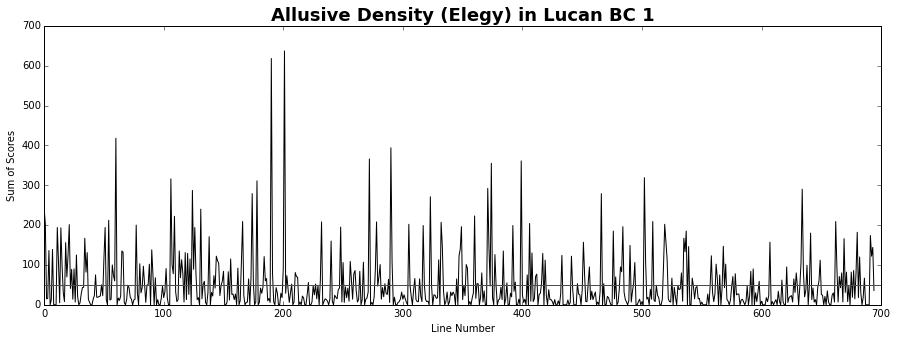

In [39]:
fig = plt.figure()
fig.set_size_inches(15,5)
ax = fig.add_subplot(111)
ax.plot(y, color="k")
ax.axhline(y=avg, color='red')
ax.set_title('Allusive Density (Elegy) in Lucan BC 1',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')
plt.show()

In [40]:
def smooth_list(x,window):
    smoothed_list = []
    for i in range(0,len(x)-window):
        smoothed_list.append(sum(x[i:i+window])/window)
    return smoothed_list

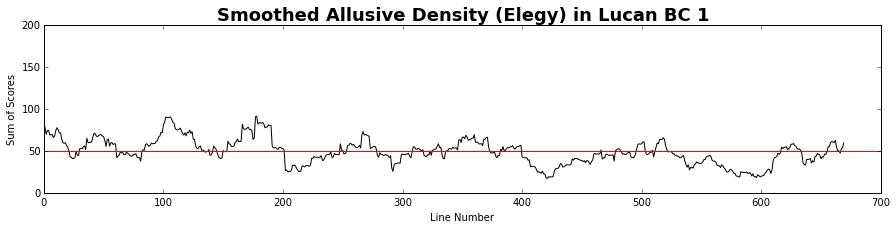

In [41]:
window = 25
bc1_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.set_ylim([0, 200])

ax.plot(bc1_smooth, color='k')
ax.axhline(y=avg, color='red')

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 1',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

In [42]:
def add_blank_scores(x,y,length):
# Numpy agg function (obv.) leaves out lines that have no results, so we need to put the zeroes back in

    z = []

    for i in range(1,length+1):
        if i in x:
            z.append((i,y[x.index(i)]))
        else:
            z.append((i,0))
        
    scores = [list(t) for t in zip(*z)]

    return scores[0],scores[1]

Let's do the same thing for *BC* 3. The opening scene of this book (3.1-45)—Pompey's former wife Julia, now dead five years, visits him in a dream as he leaves Italy for Greece—is the scene which perhaps more than any other has received attention for being influence by Latin love elegy (specifically Propertius 4.7).

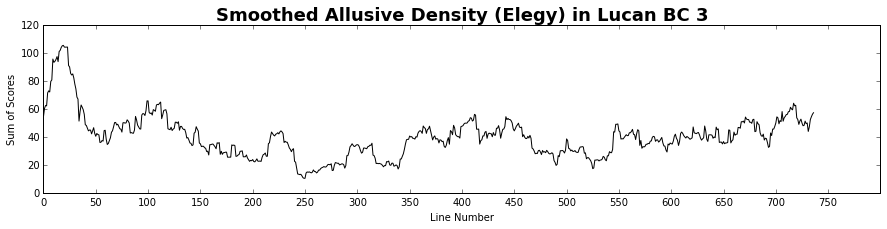

In [43]:
bc3 = results.loc[results['TARGET_BOOK'] == 3]
bc3 = bc3.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc3_scores = bc3.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})

x = list(bc3_scores.index)
y = list(bc3_scores['SCORE']['sum'])

bc3_len = 762
x, y = add_blank_scores(list(bc3_scores.index),list(bc3_scores['SCORE']['sum']),bc3_len)

window = 25
bc3_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc3_smooth, color='k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 3',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

Zooming in on the first part of book...

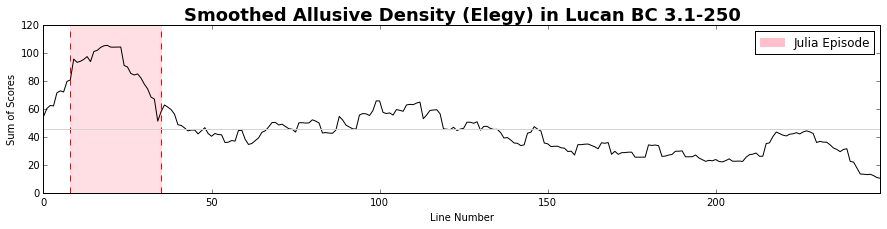

In [44]:
window = 25
bc3_smooth = smooth_list(y,window)[:250]

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc3_smooth, color='k')

xticks = np.arange(0,250,50)
ax.set_xticks(xticks)

ax.axvline(8, color='r', linestyle='--')
ax.axvline(35, color='r', linestyle='--')
ax.axvspan(8, 35, alpha=0.5, color='pink')

avg = sum(bc3_smooth)/len(bc3_smooth)
ax.axhline(y=avg, color='lightgray')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='pink', label='Julia Episode')
plt.legend(handles=[red_patch])


ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 3.1-250',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

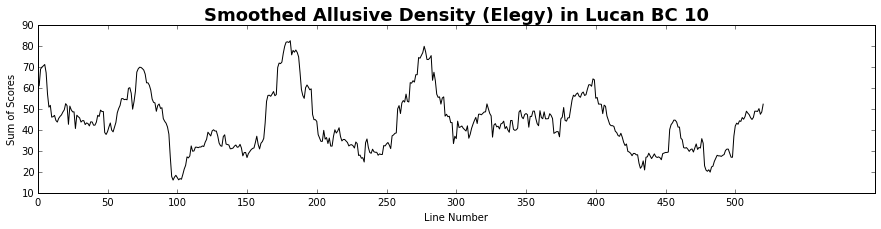

In [45]:
bc10 = results.loc[results['TARGET_BOOK'] == 10]
bc10 = bc10.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc10_scores = bc10.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})

x = list(bc10_scores.index)
y = list(bc10_scores['SCORE']['sum'])
bc10_len = 546

x, y = add_blank_scores(list(bc10_scores.index),list(bc10_scores['SCORE']['sum']),bc10_len)

window = 25
bc10_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc10_smooth, color='k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 10',fontsize = 18, fontweight = "bold")
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

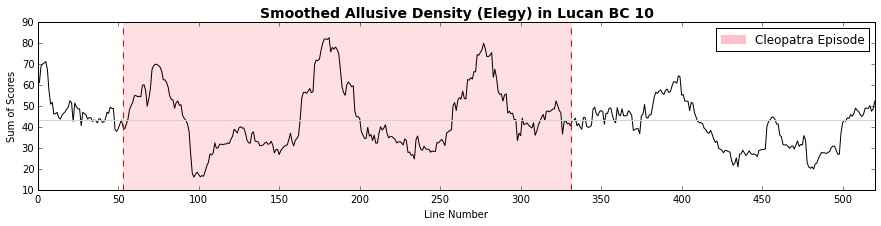

In [46]:
bc10 = results.loc[results['TARGET_BOOK'] == 10]
bc10 = bc10.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc10_scores = bc10.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})

x = list(bc10_scores.index)
y = list(bc10_scores['SCORE']['sum'])
bc10_len = 546

x, y = add_blank_scores(list(bc10_scores.index),list(bc10_scores['SCORE']['sum']),bc10_len)

window = 25
bc10_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc10_smooth, color = 'k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.axvline(53, color='r', linestyle='--')
ax.axvline(331, color='r', linestyle='--')
ax.axvspan(53, 331, alpha=0.5, color='pink')

avg = sum(bc10_smooth)/len(bc10_smooth)
ax.axhline(y=avg, color='lightgray')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='pink', label='Cleopatra Episode')
plt.legend(handles=[red_patch])

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 10', fontsize=14,fontweight='bold')
ax.set_xlabel('Line Number')
ax.set_ylabel('Sum of Scores')

plt.show()

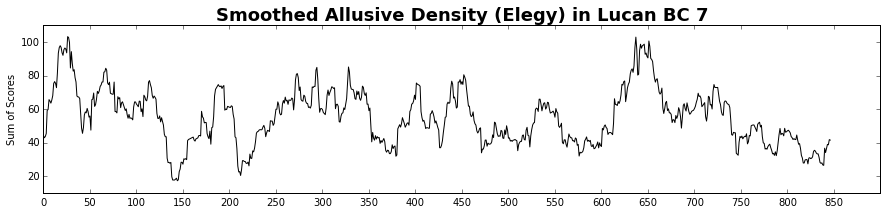

In [47]:
bc7 = results.loc[results['TARGET_BOOK'] == 7]
bc7 = bc7.sort_index(by=['TARGET_BOOK','TARGET_LINE'], ascending=[True,True])
bc7_scores = bc7.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})

x = list(bc7_scores.index)
y = list(bc7_scores['SCORE']['sum'])
bc7_len = 872

x, y = add_blank_scores(list(bc7_scores.index),list(bc7_scores['SCORE']['sum']),bc7_len)

window = 25
bc7_smooth = smooth_list(y,window)

fig = plt.figure()
fig.set_size_inches(15,3)
ax = fig.add_subplot(111)
ax.plot(bc7_smooth, color='k')

xticks = np.arange(0,max(x),50)
ax.set_xticks(xticks)

ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC 7',fontsize = 18, fontweight = "bold")
ax.set_ylabel('Sum of Scores')

plt.show()

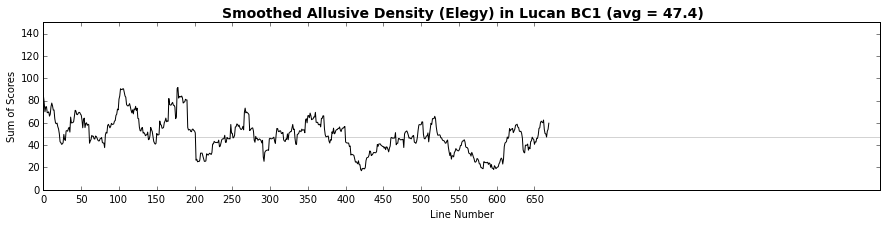

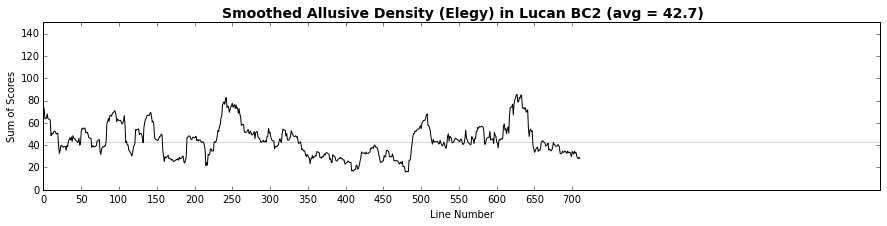

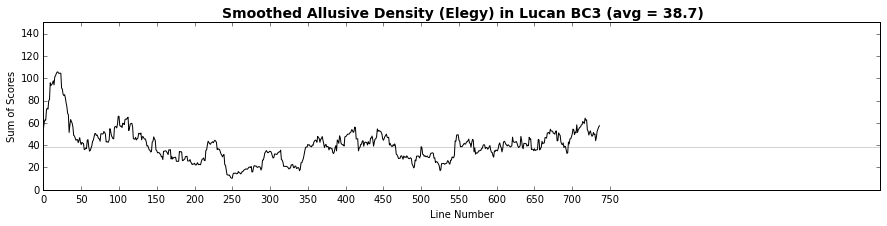

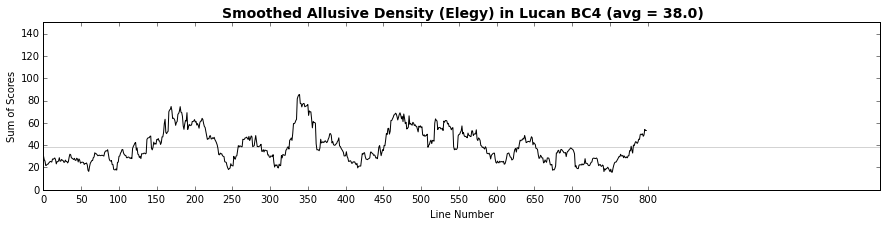

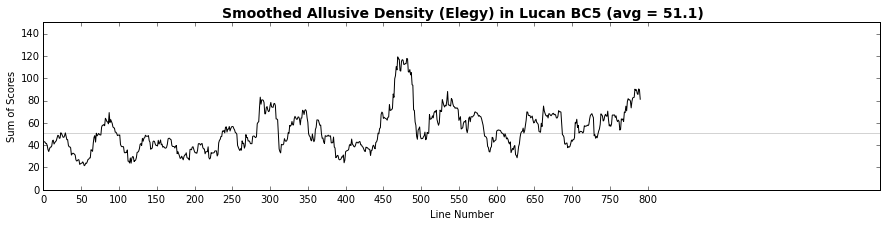

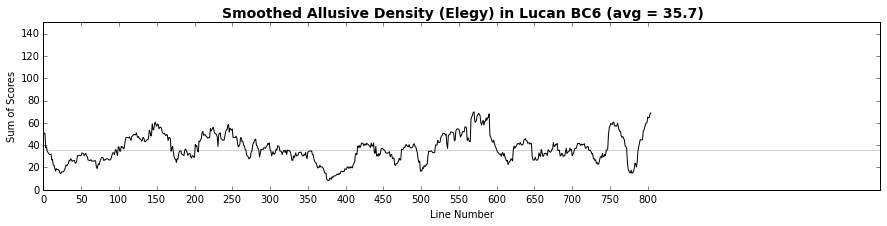

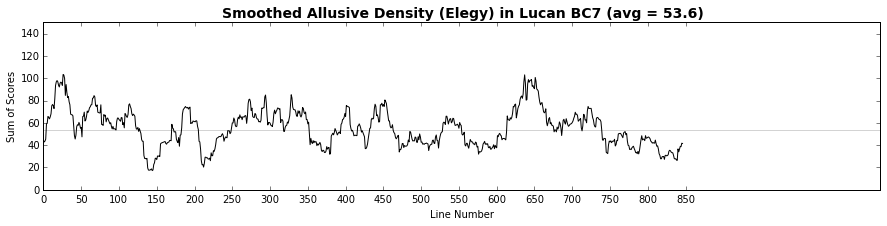

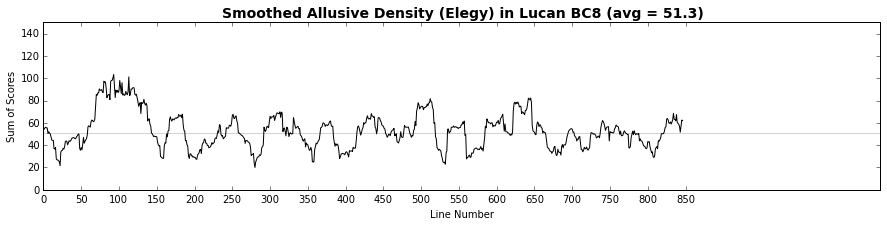

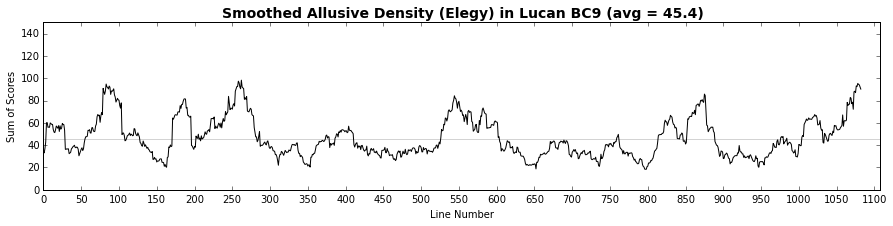

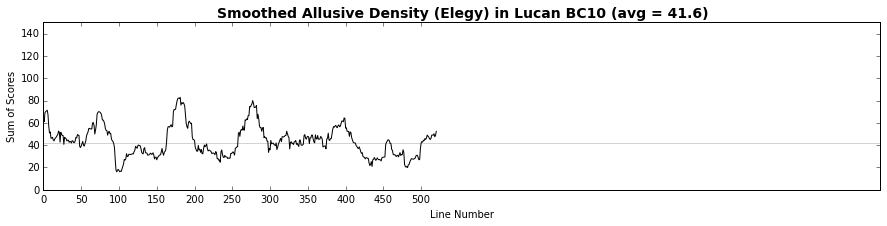

In [48]:
def plot_allusive_density(results, book, length, window=15):
    subset = results.loc[results['TARGET_BOOK'] == book]
    subset_scores = subset.groupby('TARGET_LINE').agg({'TARGET_LINE': [np.size],'SCORE':[np.sum]})
    
    subset_scores_index = list(subset_scores.index)
    subset_scores_list = list(subset_scores['SCORE']['sum'])
    x, y = add_blank_scores(subset_scores_index,subset_scores_list,length)
    subset_scores_list = y
    
    subset_scores_list_smoothed = smooth_list(subset_scores_list,window)

    avg = sum(subset_scores_list_smoothed)/len(subset_scores_list)
    
    
    fig = plt.figure()

    fig.set_size_inches(15,3)
    ax = fig.add_subplot(111)
    ax.axhline(y=avg, color='lightgray')
    ax.plot(subset_scores_list_smoothed, color="black")

    xticks = np.arange(0,max(x),50)
    ax.set_xticks(xticks)

    ax.set_ylim([0, 150])
    ax.set_xlim([0, 1108])

    ax.set_title('Smoothed Allusive Density (Elegy) in Lucan BC' + str(book) + ' (avg = ' + str(round(avg,1)) + ')', fontsize = 14, fontweight = 'bold')
    ax.set_xlabel('Line Number')
    ax.set_ylabel('Sum of Scores')

    plt.show()
    
lucan_book_lengths = [695,736,762,824,816,830,872,872,1108,546]
    
for i in range(1,11):
    plot_allusive_density(results, i, lucan_book_lengths[i-1],window=25)

# If you have any questions, feedback, etc.
## Patrick Burns
### email: paburns@fordham.edu or patrick@diyclassics.org
### twitter: @diyclassics